In [91]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet152
from keras.applications.resnet import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import optimizers
import tensorflow as tf
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tqdm import tqdm

In [92]:
IMAGE_SIZE = [224, 224]
# batch_size = 32
batch_size = 32
numOfEpochs = 100
optimizer = tf.keras.optimizers.Adam()
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
# optimizer = tf.keras.optimizers.RMSprop()

In [93]:
#Give dataset path
# train_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\train'
# test_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\test'
# validation_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Augmented\validation'
train_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\train'
test_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\test'
validation_path = r'C:\Users\Ezazr\Desktop\UNet-TF-new\Classification-Dataset - Cross Validation 4 fold\Fold 4\validation'

In [94]:
inception = ResNet152(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [95]:
inception.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

In [96]:
for layer in inception.layers:
  layer.trainable = False

In [97]:
folders = glob(train_path + '/*')
print(len(folders))

2


In [98]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block6_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block6_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block6_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block6_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block6_2_relu[0][0]']    
                                                                                                  
 conv3_block6_3_bn (BatchNormal  (None, 28, 28, 512)  2048       ['conv3_block6_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv4_block1_0_conv (Conv2D)   (None, 14, 14, 1024  525312      ['conv3_block8_out[0][0]']       
                                )                                                                 
                                                                                                  
 conv4_block1_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block1_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 14, 14, 1024  4096       ['conv4_block1_0_conv[0][0]']    
 ization)                       )                                                                 
          

                                                                                                  
 conv4_block4_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block4_1_relu[0][0]']    
                                                                                                  
 conv4_block4_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block4_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block4_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block4_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block4_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block4_2_relu[0][0]']    
          

 n)                                                                                               
                                                                                                  
 conv4_block7_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block7_1_relu[0][0]']    
                                                                                                  
 conv4_block7_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block7_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block7_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block7_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 conv4_block10_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block10_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block10_1_relu[0][0]']   
                                                                                                  
 conv4_block10_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block10_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block10_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block10_2_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block13_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block13_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block13_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block13_1_relu[0][0]']   
                                                                                                  
 conv4_block13_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block13_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block13_2_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block13_2_bn[0][0]']     
 on)      

 lization)                                                                                        
                                                                                                  
 conv4_block16_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block16_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block16_1_relu[0][0]']   
                                                                                                  
 conv4_block16_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block16_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block19_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block19_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block19_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block19_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block19_1_relu[0][0]']   
                                                                                                  
 conv4_block19_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block19_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block22_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block22_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block22_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block22_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block22_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block22_1_relu[0][0]']   
                                                                                                  
 conv4_block22_2_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block22_2_conv[0][0]']   
 lization)

 conv4_block25_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block24_out[0][0]']      
                                                                                                  
 conv4_block25_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block25_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block25_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block25_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block25_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block25_1_relu[0][0]']   
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block28_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block27_out[0][0]']      
                                                                                                  
 conv4_block28_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block28_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block28_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block28_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block28_2_conv (Conv2D)  (None, 14, 14, 256)  590080      ['conv4_block28_1_relu[0][0]']   
          

                                )                                                                 
                                                                                                  
 conv4_block31_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block30_out[0][0]']      
                                                                                                  
 conv4_block31_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block31_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block31_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block31_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block33_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block33_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block34_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block33_out[0][0]']      
                                                                                                  
 conv4_block34_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block34_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block34_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block34_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block36_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block36_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 7, 7, 512)    524800      ['conv4_block36_out[0][0]']      
                                                                                                  
 conv5_block1_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block1_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block1_1_bn[0][0]']      
 n)       

                                                                  'conv5_block3_3_bn[0][0]']      
                                                                                                  
 conv5_block3_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block3_add[0][0]']       
                                                                                                  
 flatten_3 (Flatten)            (None, 100352)       0           ['conv5_block3_out[0][0]']       
                                                                                                  
 dense_3 (Dense)                (None, 2)            200706      ['flatten_3[0][0]']              
                                                                                                  
Total params: 58,571,650
Trainable params: 200,706
Non-trainable params: 58,370,944
__________________________________________________________________________________________________


In [99]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [100]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [101]:
validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [102]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [103]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 714 images belonging to 2 classes.


In [104]:
validation_set = validation_datagen.flow_from_directory(validation_path,
                                                 target_size = (224, 224),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

Found 88 images belonging to 2 classes.


In [105]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 107 images belonging to 2 classes.


In [106]:

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)


model_history=model.fit(
  train_set,
  validation_data=validation_set,
  epochs=numOfEpochs,
  steps_per_epoch=5,
#   validation_steps=32,
  batch_size=batch_size,
#   callbacks=[es],
  verbose=2)



Epoch 1/100
5/5 - 116s - loss: 6.0537 - accuracy: 0.5500 - val_loss: 12.9954 - val_accuracy: 0.5114 - 116s/epoch - 23s/step
Epoch 2/100
5/5 - 96s - loss: 5.8940 - accuracy: 0.5938 - val_loss: 6.9610 - val_accuracy: 0.5341 - 96s/epoch - 19s/step
Epoch 3/100
5/5 - 99s - loss: 3.1353 - accuracy: 0.7125 - val_loss: 4.3112 - val_accuracy: 0.6705 - 99s/epoch - 20s/step
Epoch 4/100
5/5 - 85s - loss: 2.9527 - accuracy: 0.7319 - val_loss: 3.5357 - val_accuracy: 0.7727 - 85s/epoch - 17s/step
Epoch 5/100
5/5 - 98s - loss: 2.3100 - accuracy: 0.7750 - val_loss: 2.9771 - val_accuracy: 0.7727 - 98s/epoch - 20s/step
Epoch 6/100
5/5 - 97s - loss: 1.2911 - accuracy: 0.8875 - val_loss: 1.3236 - val_accuracy: 0.8636 - 97s/epoch - 19s/step
Epoch 7/100
5/5 - 99s - loss: 1.1965 - accuracy: 0.8813 - val_loss: 1.1743 - val_accuracy: 0.9091 - 99s/epoch - 20s/step
Epoch 8/100
5/5 - 97s - loss: 0.7493 - accuracy: 0.9062 - val_loss: 1.5063 - val_accuracy: 0.8182 - 97s/epoch - 19s/step
Epoch 9/100
5/5 - 97s - loss:

Epoch 68/100
5/5 - 97s - loss: 0.4454 - accuracy: 0.9563 - val_loss: 0.2191 - val_accuracy: 0.9886 - 97s/epoch - 19s/step
Epoch 69/100
5/5 - 101s - loss: 0.3379 - accuracy: 0.9937 - val_loss: 0.4751 - val_accuracy: 0.9773 - 101s/epoch - 20s/step
Epoch 70/100
5/5 - 100s - loss: 0.1564 - accuracy: 0.9750 - val_loss: 0.6682 - val_accuracy: 0.9432 - 100s/epoch - 20s/step
Epoch 71/100
5/5 - 99s - loss: 0.2729 - accuracy: 0.9812 - val_loss: 0.3035 - val_accuracy: 0.9432 - 99s/epoch - 20s/step
Epoch 72/100
5/5 - 99s - loss: 0.3415 - accuracy: 0.9688 - val_loss: 0.0527 - val_accuracy: 0.9886 - 99s/epoch - 20s/step
Epoch 73/100
5/5 - 100s - loss: 0.3133 - accuracy: 0.9812 - val_loss: 0.5998 - val_accuracy: 0.9432 - 100s/epoch - 20s/step
Epoch 74/100
5/5 - 85s - loss: 0.2273 - accuracy: 0.9855 - val_loss: 0.6610 - val_accuracy: 0.9545 - 85s/epoch - 17s/step
Epoch 75/100
5/5 - 98s - loss: 0.1736 - accuracy: 0.9812 - val_loss: 0.3331 - val_accuracy: 0.9659 - 98s/epoch - 20s/step
Epoch 76/100
5/5 -

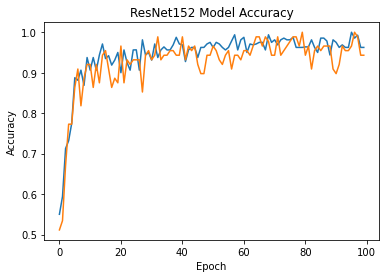

In [107]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
# plt.plot(model_history.history['loss'])
plt.title('ResNet152 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


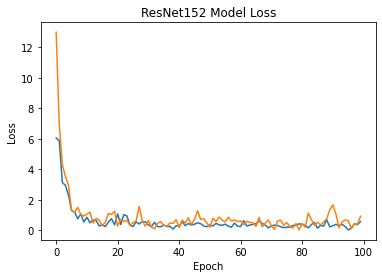

In [108]:
_# Plot training & validation loss values
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('ResNet152 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [109]:
result = model.evaluate(test_set)
print("test_loss, test accuracy",result)

4/4 [==============================] - 42s 10s/step - loss: 0.8691 - accuracy: 0.9439
test_loss, test accuracy [0.8691402077674866, 0.9439252614974976]


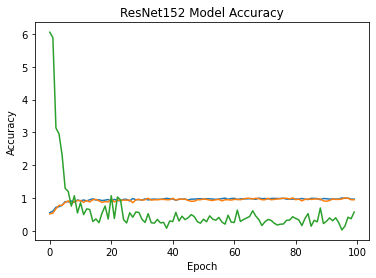

In [110]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.plot(model_history.history['loss'])
plt.title('ResNet152 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()


In [111]:
# epochs = list(range(0,numOfEpochs))
# plt.plot(model_history.history['accuracy'])
# plt.plot(epochs)
# plt.title('CNN Model accuracy values')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [112]:
# epochs = list(range(0,numOfEpochs))
# plt.plot(model_history.history['loss'])
# plt.plot(epochs)
# plt.title('CNN Model loss values')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

In [113]:
resss = model.predict(test_set)
print(np.array(tf.argmax(resss, axis=1)))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [114]:
from sklearn.metrics import roc_curve, auc
import glob
import os

Aedes_Count = 0;
test_labels = []
#for directory_path in glob.glob("cell_images/test/*"): 
for directory_path in glob.glob(test_path + "/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        if(label == 'Aedes'):
            Aedes_Count = Aedes_Count + 1;
            test_labels.append(0)
        else:
            test_labels.append(1)
        
test_labels = np.array(test_labels)

In [115]:
def get_datalevel2():
    datalevel= []
    for i in range(len(test_labels)):
        if(i < Aedes_Count):
            datalevel.append([1,0])
        else:
            datalevel.append([0,1])
    return np.array(datalevel)


In [116]:
testdataLevels = get_datalevel2()
# print(testdataLevels)
y_score = model.predict(test_set)
# preds = y_score[:,1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(testdataLevels[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

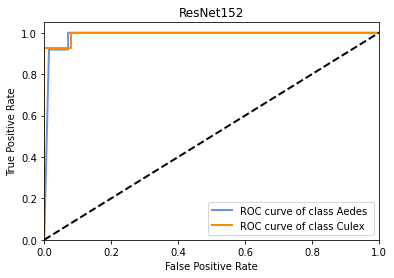

In [117]:
colors = ["cornflowerblue", "darkorange"]
classes = ['Aedes','Culex']

plt.figure()
lw = 2
for i in range(2):
    plt.plot(
        fpr[i],
        tpr[i],
        color=colors[i],
        lw=lw,
        label="ROC curve of class {0} ".format(classes[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ResNet152")
plt.legend(loc="lower right")
plt.show()

In [118]:
roc_auc

{0: 0.9876447876447877, 1: 0.9942084942084942}

In [119]:
from sklearn import metrics

test_labels_predict = [];
for i in range(len(y_score)):
    if(y_score[i][0] > y_score[i][1]):
        test_labels_predict.append(0)
    else:
        test_labels_predict.append(1)
        
test_labels_predict = np.array(test_labels_predict)

# confusion_matrix
confusion = metrics.confusion_matrix(test_labels, test_labels_predict)
print(confusion)

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
SPC = TN / float(TN+FP)
TPR = TP / float(TP+FN)
print('\nSPC = ', SPC, '\nTPR = ', TPR)

[[35  2]
 [ 5 65]]

SPC =  0.9459459459459459 
TPR =  0.9285714285714286


In [120]:
model.save('ResNet152-4.h5')

In [139]:
test_set[0][0].shape

(32, 224, 224, 3)